In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input Data ##################################################

Lx = 0.4      #[m]
Ly = 0.4      #[m]
dx = 0.01     #[m]
dy = 0.01     #[m]
dt = 0.0001    #[s]
t_max = 3     #[s]    
nu = 0.01     #[s/m^2]
U = 5         #[m/s]

tol = 1e-5

# Meshing

x = np.arange(0, Lx+dx, dx)
Nx = len(x) - 1
y = np.arange(0, Ly+dy, dy)
Ny = len(y) - 1
t = np.arange(0, t_max+dt, dt)
num_timesteps = int(len(t) - 1)


# Define Initial condition:
u_plot_plot_ploto = 0
vo = 0

In [3]:
 # Argon Physical Properties
rho = 1.633             #[kg/m^3]  Density
C = 520                 #[J/kg-K]  Specific Heat Capacit
alpha = 2.2e-5          #[m^2/s]   Thermal diffusivity
mu = 3.77e-5            # Dynamic viscosity
nu = mu/rho             # [Pa-s]

#Meshing
Lx = 0.4       #[m]
Ly = 0.4       #[m]
dx = 0.005     #[m]
dy = 0.005     #[m]
dt = 0.0001 
t_max = 2     #[s]    
x = np.arange(0, Lx+dx, dx)
Nx = len(x) - 1
y = np.arange(0, Ly+dy, dy)
Ny = len(y) - 1
t = np.arange(0, t_max+dt, dt)
num_timesteps = int(len(t) - 1)
# Inlet
inlet_height = 0.3
inlet_size = 0.05
outlet_height = 0.15
outlet_size = 0.05

In [4]:
print('Number of points (x-direction): {0:2d} '.format(Nx+1))
print('Number of points (y-direction): {0:2d} '.format(Ny+1))
print('Mesh size (dx): {0:.8f} mm'.format(dx))
print('Mesh size (dy): {0:.8f} mm'.format(dy))
print('Number of time steps: {0:2d} '.format(num_timesteps))
print('Time step (dt): {0:.8f} s'.format(dt))


Number of points (x-direction): 81 
Number of points (y-direction): 81 
Mesh size (dx): 0.00500000 mm
Mesh size (dy): 0.00500000 mm
Number of time steps: 20000 
Time step (dt): 0.00010000 s


In [5]:
u = np.zeros((Nx+2, Ny+2))
v = np.zeros((Nx+2, Ny+2)) # Apply boundary condition on index Nx-1
p = np.zeros((Nx+2, Ny+2))

In [6]:
# Initial Condition

# Left wall
u[0,:] = 5


In [7]:
for n in range(100):
    print(n)
    
    """# IMPOSE BOUNDARY CONDITIONS
    u[:,1] = - u[:,0]
    v[:,0] = 0

    # Left wall
    u[0,:] = 5
    v[1,:] = - v[0,:]

    # Top wall
    u[:,-2] = - u[:,-1]
    v[:,-1] = 0
    v[:,-2] = 0

    # Right wall
    u[-2,:] = u[-1,:]
    v[-2,:] = - v[-1,:]
"""
    
    # A (Convective term)
    # Structure to understand

    A_u = -(((u[1:-1,1:-1] + u[2:,1:-1])/2)**2 - ((u[1:-1,1:-1] + u[0:-2,1:-1])/2)**2)/dx + (((u[1:-1,2:] + u[1:-1,1:-1])/2)*((v[2:,1:-1] + v[1:-1,1:-1])/2) - ((u[1:-1,1:-1] + u[1:-1,:-2])/2)*((v[1:-1,0:-2] + v[2:,0:-2])/2))/dy
    A_v = -(((v[1:-1,1:-1] + v[2:,1:-1])/2)*((u[1:-1,1:-1] + u[1:-1,:-2])/2) - ((v[1:-1,1:-1] + v[:-2,1:-1])/2)*((u[0:-2,2:] + u[0:-2,1:-1])/2))/dx + (((v[1:-1,1:-1] + v[1:-1,2:])/2)**2 - ((v[1:-1,1:-1] + v[1:-1,0:-2])/2)**2)/dy
    """print(np.shape(A_u))
    print(np.shape(A_v))"""
    # B (Diffusion term)
    B_u = nu*((u[2:,1:-1] - 2*u[1:-1,1:-1] + u[0:-2,1:-1])/dx**2) 
    B_v = nu*((v[1:-1,2:] - 2*v[1:-1,1:-1] + v[1:-1,0:-2])/dy**2) 
    """print(np.shape(B_u))
    print(np.shape(B_v))"""

    # Step 1 - Compute u_temp and v_temp (u* in the discretization)
    u_temp = np.zeros_like(u)
    v_temp = np.zeros_like(v)
    u_temp[1:-1, 1:-1] = u[1:-1, 1:-1] + dt*(A_u + B_u)
    v_temp[1:-1, 1:-1] = v[1:-1, 1:-1] + dt*(A_v + B_v)

    # Boundary conditions on u* and v*

    # Bottom wall
    u_temp[:,0] = - u_temp[:,1]
    v_temp[:,0] = 0

    # Top wall
    u_temp[:,-1] = - u_temp[:,-2]
   # v_temp[:,-1] = 0
    v_temp[:,-2] = 0

    # Right wall
    u_temp[-1,:] = u_temp[-2,:]
    v_temp[-1,:] = - v_temp[-2,:]

    # Left wall
    u_temp[0,:] = 5
    v_temp[0,:] = - v_temp[1,:]

    


    # Step 2 - Poisson iterative solver for p(n+1)
    error = 1
    p[:,-2] = p[:,-1]   
    p[1,:] = p[0,:]     
    p[:,1] = p[:,0]     
    p[-2,:] = p[-1,:]   
    # p[8,1] = 0.005
        



    p_ref = np.zeros_like(p)
    while error > tol: 

        p[1:-1,1:-1] = (p_ref[:-2,1:-1] + p_ref[2:,1:-1] + p_ref[1:-1,:-2] + p_ref[1:-1,2:])/4 - ((dx**2*rho)/(4*dt))*(((u_temp[1:-1,1:-1] - u_temp[:-2,1:-1])/(dx)) + ((v_temp[1:-1,1:-1] - v_temp[1:-1,0:-2])/(dy)))
        # adding boundary conditions
        #p[30:40,-1] = 4    # Outlet condition

        error =  np.linalg.norm(p-p_ref)
        #print(error)

        p_ref = p.copy()

    p[:,0] = p[:,1]   # Bottom wall   
    p[:,-1] = p[:,-2] # Top wall
    p[-1,:] = p[-2,:] # Right wall
    p[0,:] = p[1,:]   # Left wall
    

    # Compute u(n+1) and v(n+1)
    u[1:-1,1:-1] = u_temp[1:-1,1:-1] - (dt/rho)*((p[2:,1:-1] - p[1:-1,1:-1])/(dx))
    v[1:-1,1:-1] = v_temp[1:-1,1:-1] - (dt/rho)*((p[1:-1,2:] - p[1:-1,1:-1])/(dy))

    # Bottom wall
    u[:,0] = - u[:,1]
    v[:,0] = 0

    # Top wall
    u[:,-1] = - u[:,-2]
    v[:,-1] = 0
    v[:,-2] = 0

    # Right wall
    u[-1,:] = u[-2,:]
    v[-1,:] = v[-2,:]

    # Left wall
    u[0,:] = 5
    v[0,:] = - v[1,:]

    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


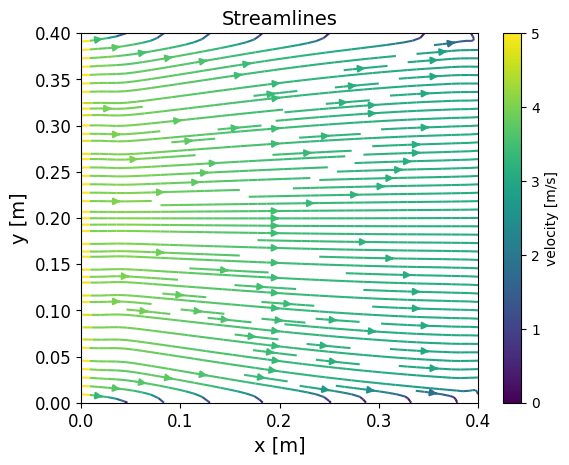

In [8]:
xx, yy = np.meshgrid(x,y)

u_plot = (u[:-1,1:] + u[:-1,:-1])/2
v_plot = (v[1:,:-1] + v[:-1,:-1])/2

"""u_plot = u
v_plot = v"""
    
plt.streamplot(xx,yy,u_plot.T, v_plot.T, color=np.sqrt(u_plot.T*u_plot.T + v_plot.T*v_plot.T),density=1.5,linewidth=1.5, cmap=plt.cm.viridis)
plt.colorbar(label = 'velocity [m/s]')
plt.xlabel('x [m]',fontsize = 14 )
plt.ylabel('y [m]',fontsize = 14 )
plt.title('Streamlines', fontsize = 14)
plt.tick_params(labelsize=12)
plt.ylim([0,0.4])
plt.xlim([0,0.4])
plt.show()

In [9]:
print(np.shape(xx))
print(np.shape(yy))


(81, 81)
(81, 81)


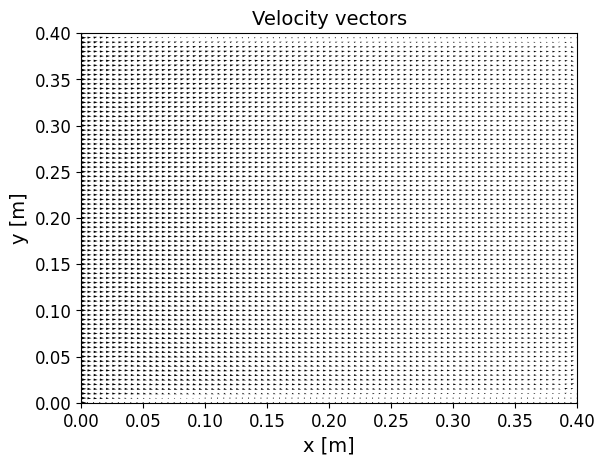

In [10]:
plt.quiver(xx, yy, u_plot.T, v_plot.T)

plt.xlabel('x [m]',fontsize = 14 )
plt.ylabel('y [m]',fontsize = 14 )
plt.title('Velocity vectors', fontsize = 14)
plt.tick_params(labelsize=12)
plt.ylim([0,0.4])
plt.xlim([0,0.4])
plt.show()        

In [11]:
print(u_plot)

[[ 5.          5.          5.         ...  5.          5.
   5.        ]
 [ 0.          3.66779101  3.94937387 ...  4.02370567  3.58421993
   0.        ]
 [ 0.          3.52181535  3.77202459 ...  4.02038087  3.50155531
   0.        ]
 ...
 [ 0.         -0.19592714  1.98635883 ...  2.0815227   0.50923516
   0.        ]
 [ 0.         -0.60310199  0.24724691 ...  1.02474119 -0.56284674
   0.        ]
 [ 0.         -0.01237096  0.18357375 ...  0.41760479 -0.12624971
   0.        ]]


In [12]:
print(v_plot)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.62155545 -0.4839939  ...  0.45831313  0.45295156
   0.        ]
 [ 0.         -0.70628324 -0.52629009 ...  0.74201584  0.83054107
   0.        ]
 ...
 [ 0.         -0.56329397  0.60315203 ... -0.45979862  0.19740315
   0.        ]
 [ 0.         -0.86112951 -0.65491099 ... -0.17466532  0.89217768
   0.        ]
 [ 0.         -0.75350298 -1.88526787 ...  1.56137785  1.03123703
   0.        ]]
